Aggregate Metrics and Report Top 10 Customers per Engagement Metric
We'll aggregate the metrics and report the top 10 customers for each engagement metric

C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\2604580812.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_sessions['MSISDN/Number'], y=top_10_sessions['Sessions Frequency'], palette='viridis', ax=axes[0])
C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\2604580812.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_duration['MSISDN/Number'], y=top_10_duration['Total Session Duration (ms)'], palette='viridis', ax=axes[1])
C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\2604580812.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect

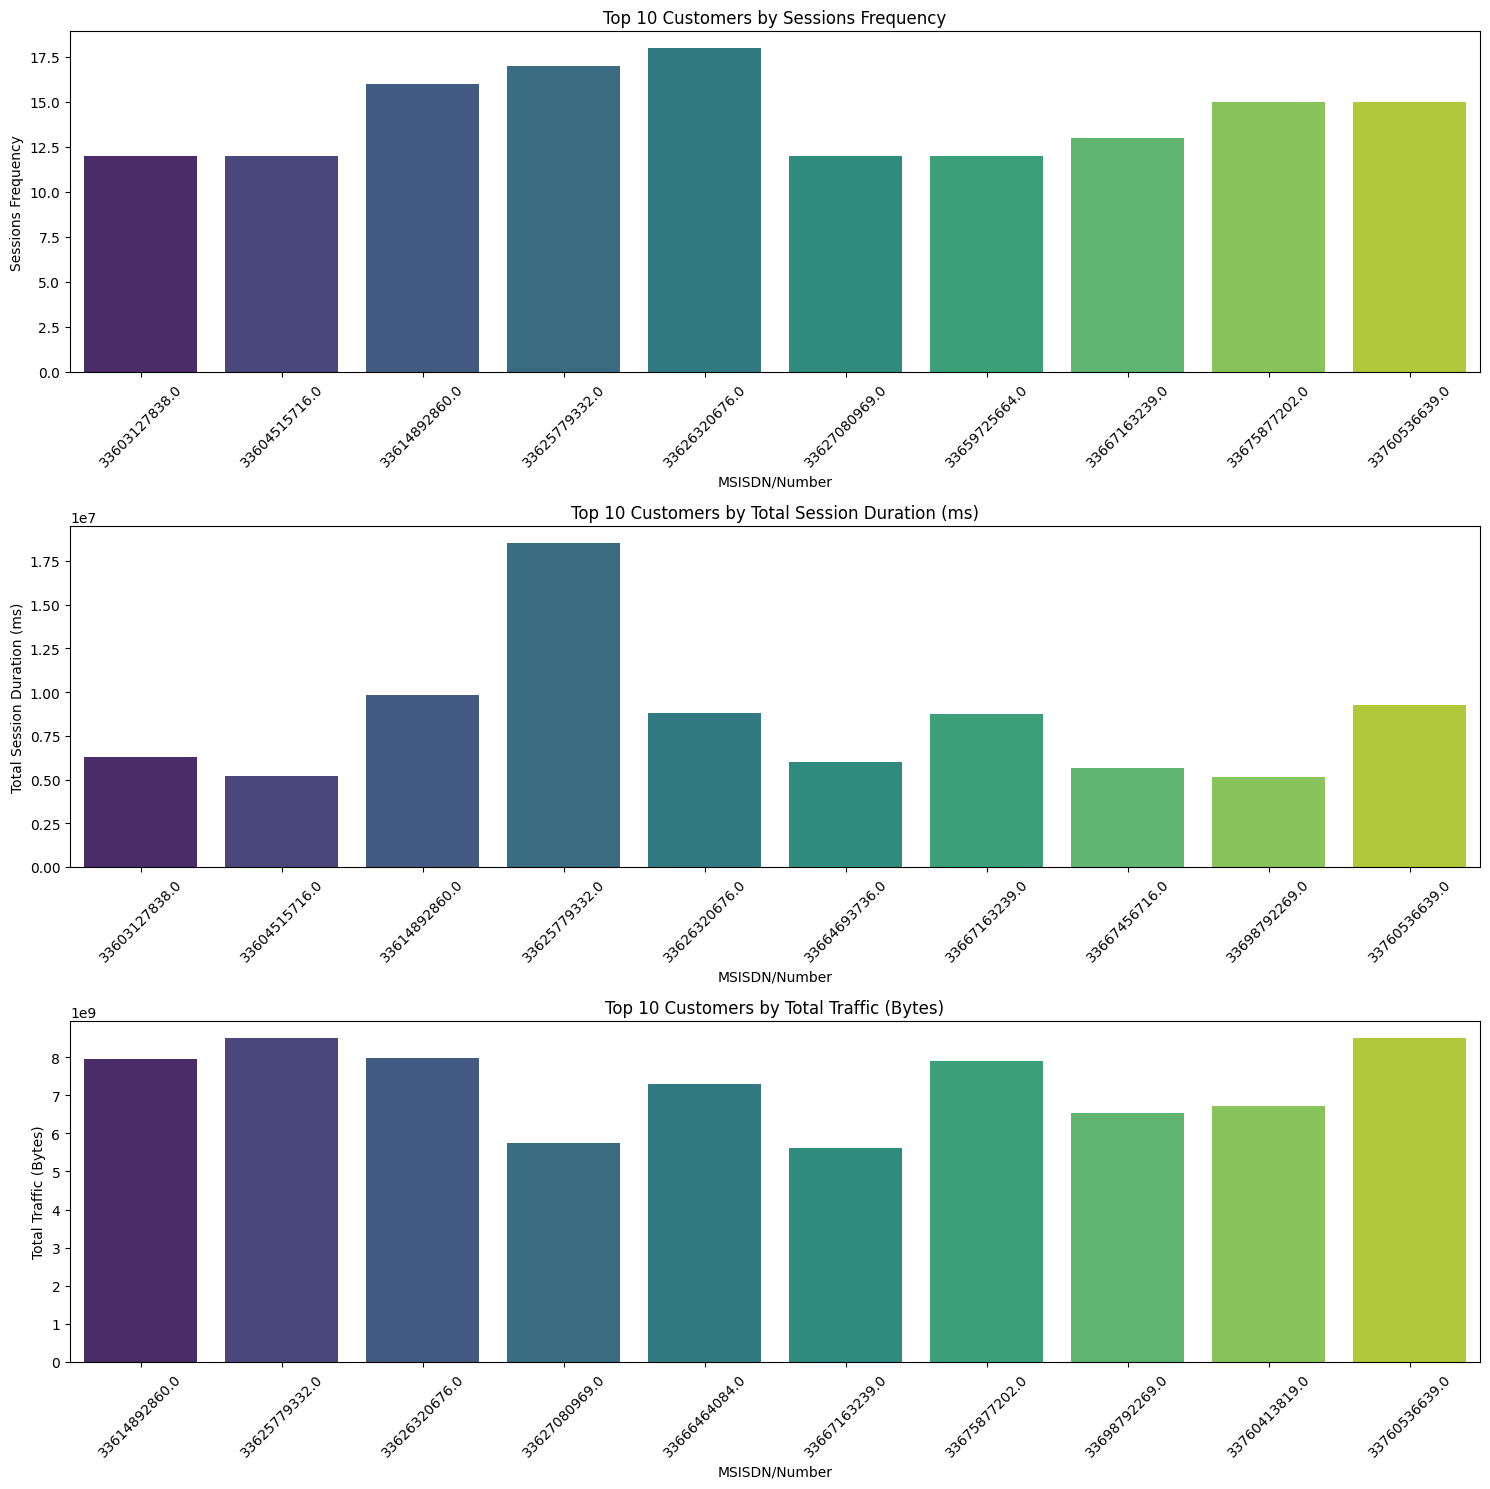

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
data_path = '../src/data/cleanedTelecomUsersData.csv'
df = pd.read_csv(data_path)

# Aggregate engagement metrics per customer ID (MSISDN)
engagement_metrics = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
engagement_metrics.columns = [
    'MSISDN/Number', 'Sessions Frequency', 'Total Session Duration (ms)', 
    'Total DL (Bytes)', 'Total UL (Bytes)'
]

# Calculate total traffic (download + upload)
engagement_metrics['Total Traffic (Bytes)'] = engagement_metrics['Total DL (Bytes)'] + engagement_metrics['Total UL (Bytes)']

# Report the top 10 customers per engagement metric
top_10_sessions = engagement_metrics.nlargest(10, 'Sessions Frequency')
top_10_duration = engagement_metrics.nlargest(10, 'Total Session Duration (ms)')
top_10_traffic = engagement_metrics.nlargest(10, 'Total Traffic (Bytes)')

# Create a single figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

# Plot the top 10 customers by sessions frequency
sns.barplot(x=top_10_sessions['MSISDN/Number'], y=top_10_sessions['Sessions Frequency'], palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Customers by Sessions Frequency')
axes[0].set_xlabel('MSISDN/Number')
axes[0].set_ylabel('Sessions Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot the top 10 customers by total session duration
sns.barplot(x=top_10_duration['MSISDN/Number'], y=top_10_duration['Total Session Duration (ms)'], palette='viridis', ax=axes[1])
axes[1].set_title('Top 10 Customers by Total Session Duration (ms)')
axes[1].set_xlabel('MSISDN/Number')
axes[1].set_ylabel('Total Session Duration (ms)')
axes[1].tick_params(axis='x', rotation=45)

# Plot the top 10 customers by total traffic
sns.barplot(x=top_10_traffic['MSISDN/Number'], y=top_10_traffic['Total Traffic (Bytes)'], palette='viridis', ax=axes[2])
axes[2].set_title('Top 10 Customers by Total Traffic (Bytes)')
axes[2].set_xlabel('MSISDN/Number')
axes[2].set_ylabel('Total Traffic (Bytes)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Normalize Each Engagement Metric and Run K-Means (k=3)
We'll normalize each engagement metric and run a k-means clustering algorithm with k=3 to classify customers into three groups of engagement.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize each engagement metric
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Sessions Frequency', 'Total Session Duration (ms)', 'Total Traffic (Bytes)']])

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Engagement Cluster'] = kmeans.fit_predict(normalized_metrics)

print("K-Means Clustering Results:")
print(engagement_metrics[['MSISDN/Number', 'Engagement Cluster']])


K-Means Clustering Results:
       MSISDN/Number  Engagement Cluster
0       3.360100e+10                   0
1       3.360100e+10                   0
2       3.360101e+10                   0
3       3.360101e+10                   2
4       3.360101e+10                   2
...              ...                 ...
99575   3.378995e+10                   0
99576   3.378996e+10                   0
99577   3.378998e+10                   2
99578   3.379000e+10                   0
99579   3.370000e+14                   0

[99580 rows x 2 columns]


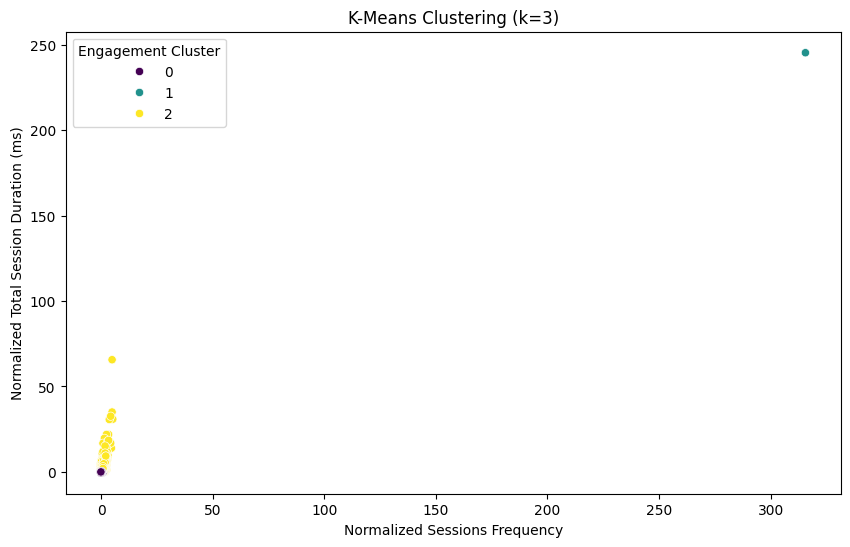

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize each engagement metric
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Sessions Frequency', 'Total Session Duration (ms)', 'Total Traffic (Bytes)']])

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Engagement Cluster'] = kmeans.fit_predict(normalized_metrics)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=normalized_metrics[:, 0], y=normalized_metrics[:, 1], hue=engagement_metrics['Engagement Cluster'], palette='viridis')
plt.title('K-Means Clustering (k=3)')
plt.xlabel('Normalized Sessions Frequency')
plt.ylabel('Normalized Total Session Duration (ms)')
plt.show()


Compute Minimum, Maximum, Average & Total Non-Normalized Metrics for Each Cluster

C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\3556567725.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_metrics['Engagement Cluster'], y=cluster_metrics['Mean Sessions Frequency'], palette='viridis')
C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\3556567725.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_metrics['Engagement Cluster'], y=cluster_metrics['Mean Total Session Duration (ms)'], palette='viridis')
C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\3556567725.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

 

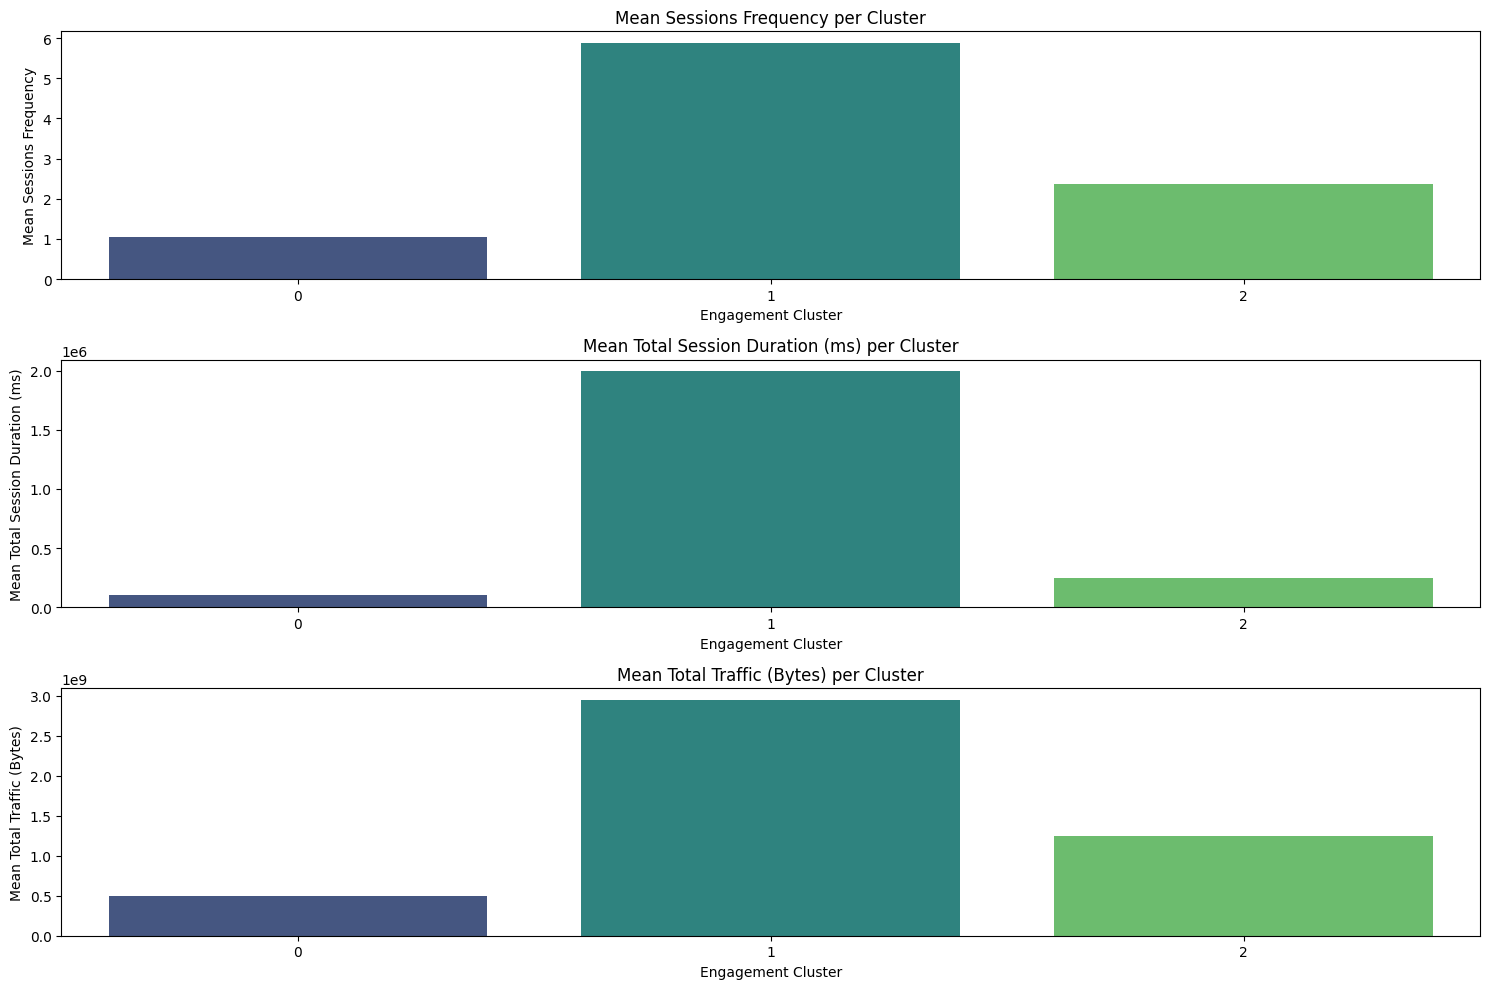

In [3]:
# Compute metrics for each cluster
cluster_metrics = engagement_metrics.groupby('Engagement Cluster').agg({
    'Sessions Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()

# Plot the cluster metrics
cluster_metrics.columns = ['Engagement Cluster', 'Min Sessions Frequency', 'Max Sessions Frequency', 'Mean Sessions Frequency', 'Total Sessions Frequency',
                           'Min Total Session Duration (ms)', 'Max Total Session Duration (ms)', 'Mean Total Session Duration (ms)', 'Total Session Duration (ms)',
                           'Min Total Traffic (Bytes)', 'Max Total Traffic (Bytes)', 'Mean Total Traffic (Bytes)', 'Total Traffic (Bytes)']

plt.figure(figsize=(15, 10))

# Plot mean metrics for each cluster
plt.subplot(3, 1, 1)
sns.barplot(x=cluster_metrics['Engagement Cluster'], y=cluster_metrics['Mean Sessions Frequency'], palette='viridis')
plt.title('Mean Sessions Frequency per Cluster')
plt.xlabel('Engagement Cluster')
plt.ylabel('Mean Sessions Frequency')

plt.subplot(3, 1, 2)
sns.barplot(x=cluster_metrics['Engagement Cluster'], y=cluster_metrics['Mean Total Session Duration (ms)'], palette='viridis')
plt.title('Mean Total Session Duration (ms) per Cluster')
plt.xlabel('Engagement Cluster')
plt.ylabel('Mean Total Session Duration (ms)')

plt.subplot(3, 1, 3)
sns.barplot(x=cluster_metrics['Engagement Cluster'], y=cluster_metrics['Mean Total Traffic (Bytes)'], palette='viridis')
plt.title('Mean Total Traffic (Bytes) per Cluster')
plt.xlabel('Engagement Cluster')
plt.ylabel('Mean Total Traffic (Bytes)')

plt.tight_layout()
plt.show()

Aggregate User Total Traffic per Application and Derive Top 10 Most Engaged Users per Application

C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\264730649.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_youtube['MSISDN/Number'], y=top_10_youtube['Total Youtube Traffic (Bytes)'], palette='viridis')
C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\264730649.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_netflix['MSISDN/Number'], y=top_10_netflix['Total Netflix Traffic (Bytes)'], palette='viridis')
C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\264730649.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x

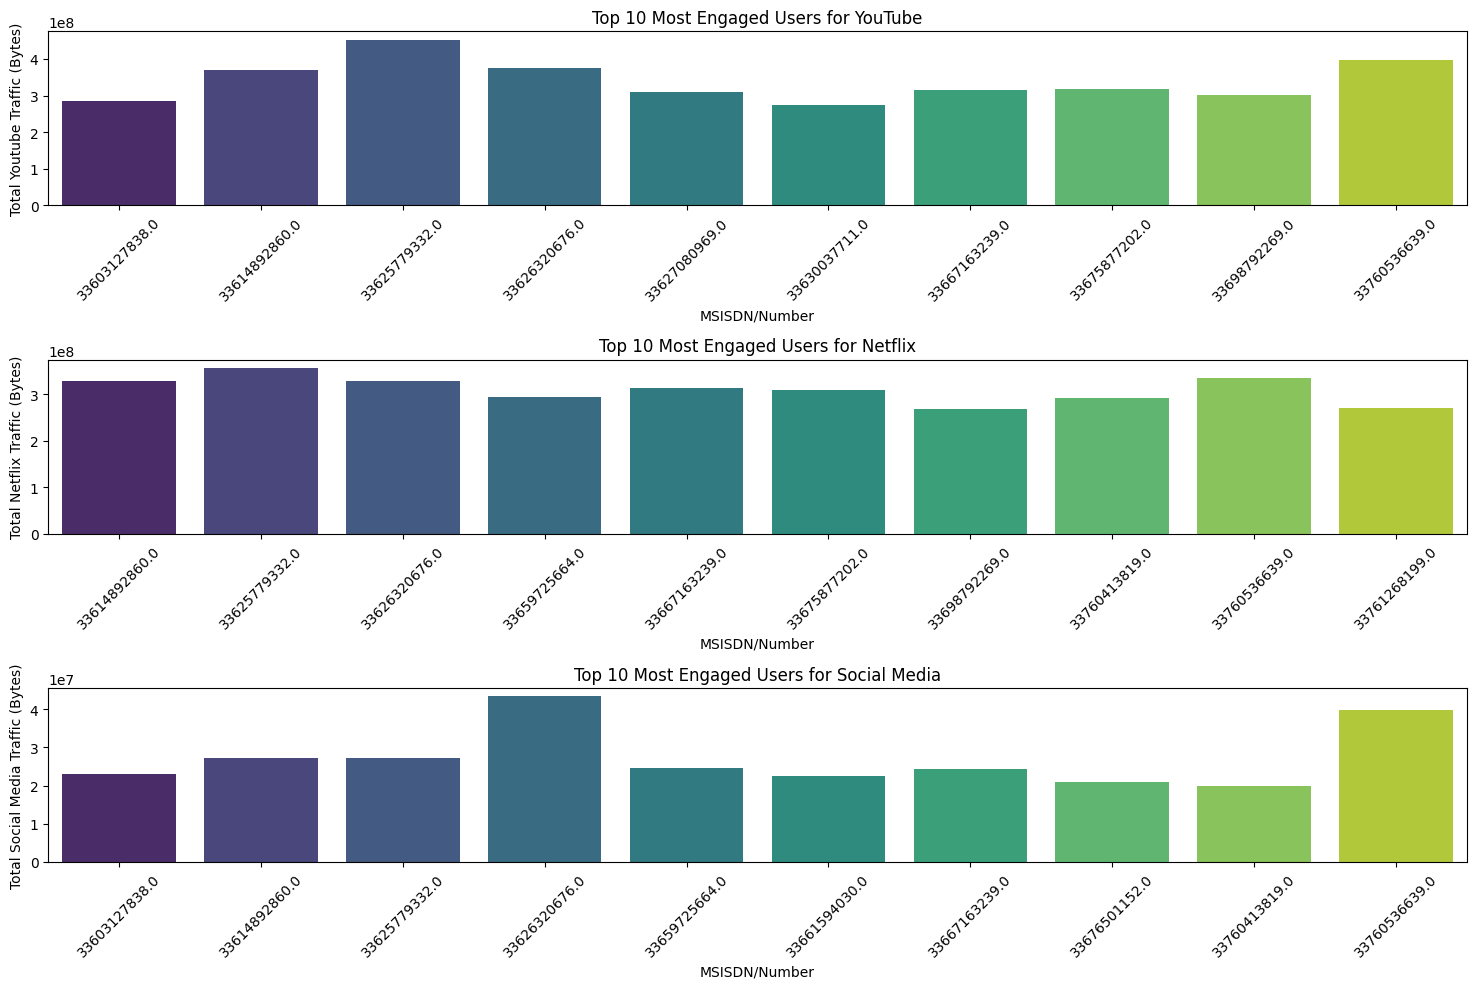

In [6]:
# Aggregate user total traffic per application
application_traffic = df.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Calculate total traffic per application
application_traffic['Total Social Media Traffic (Bytes)'] = application_traffic['Social Media DL (Bytes)'] + application_traffic['Social Media UL (Bytes)']
application_traffic['Total Google Traffic (Bytes)'] = application_traffic['Google DL (Bytes)'] + application_traffic['Google UL (Bytes)']
application_traffic['Total Email Traffic (Bytes)'] = application_traffic['Email DL (Bytes)'] + application_traffic['Email UL (Bytes)']
application_traffic['Total Youtube Traffic (Bytes)'] = application_traffic['Youtube DL (Bytes)'] + application_traffic['Youtube UL (Bytes)']
application_traffic['Total Netflix Traffic (Bytes)'] = application_traffic['Netflix DL (Bytes)'] + application_traffic['Netflix UL (Bytes)']
application_traffic['Total Gaming Traffic (Bytes)'] = application_traffic['Gaming DL (Bytes)'] + application_traffic['Gaming UL (Bytes)']
application_traffic['Total Other Traffic (Bytes)'] = application_traffic['Other DL (Bytes)'] + application_traffic['Other UL (Bytes)']

# Derive the top 10 most engaged users per application
top_10_social_media = application_traffic.nlargest(10, 'Total Social Media Traffic (Bytes)')
top_10_google = application_traffic.nlargest(10, 'Total Google Traffic (Bytes)')
top_10_email = application_traffic.nlargest(10, 'Total Email Traffic (Bytes)')
top_10_youtube = application_traffic.nlargest(10, 'Total Youtube Traffic (Bytes)')
top_10_netflix = application_traffic.nlargest(10, 'Total Netflix Traffic (Bytes)')
top_10_gaming = application_traffic.nlargest(10, 'Total Gaming Traffic (Bytes)')
top_10_other = application_traffic.nlargest(10, 'Total Other Traffic (Bytes)')

# Plot the top 10 most engaged users per application
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.barplot(x=top_10_youtube['MSISDN/Number'], y=top_10_youtube['Total Youtube Traffic (Bytes)'], palette='viridis')
plt.title('Top 10 Most Engaged Users for YouTube')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Youtube Traffic (Bytes)')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.barplot(x=top_10_netflix['MSISDN/Number'], y=top_10_netflix['Total Netflix Traffic (Bytes)'], palette='viridis')
plt.title('Top 10 Most Engaged Users for Netflix')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Netflix Traffic (Bytes)')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.barplot(x=top_10_social_media['MSISDN/Number'], y=top_10_social_media['Total Social Media Traffic (Bytes)'], palette='viridis')
plt.title('Top 10 Most Engaged Users for Social Media')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Social Media Traffic (Bytes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Plot the Top 3 Most Used Applications Using Appropriate Charts

C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\2800886906.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_youtube['MSISDN/Number'], y=top_10_youtube['Total Youtube Traffic (Bytes)'], palette='viridis')
C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\2800886906.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_netflix['MSISDN/Number'], y=top_10_netflix['Total Netflix Traffic (Bytes)'], palette='viridis')
C:\Users\Abeni\AppData\Local\Temp\ipykernel_2444\2800886906.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot

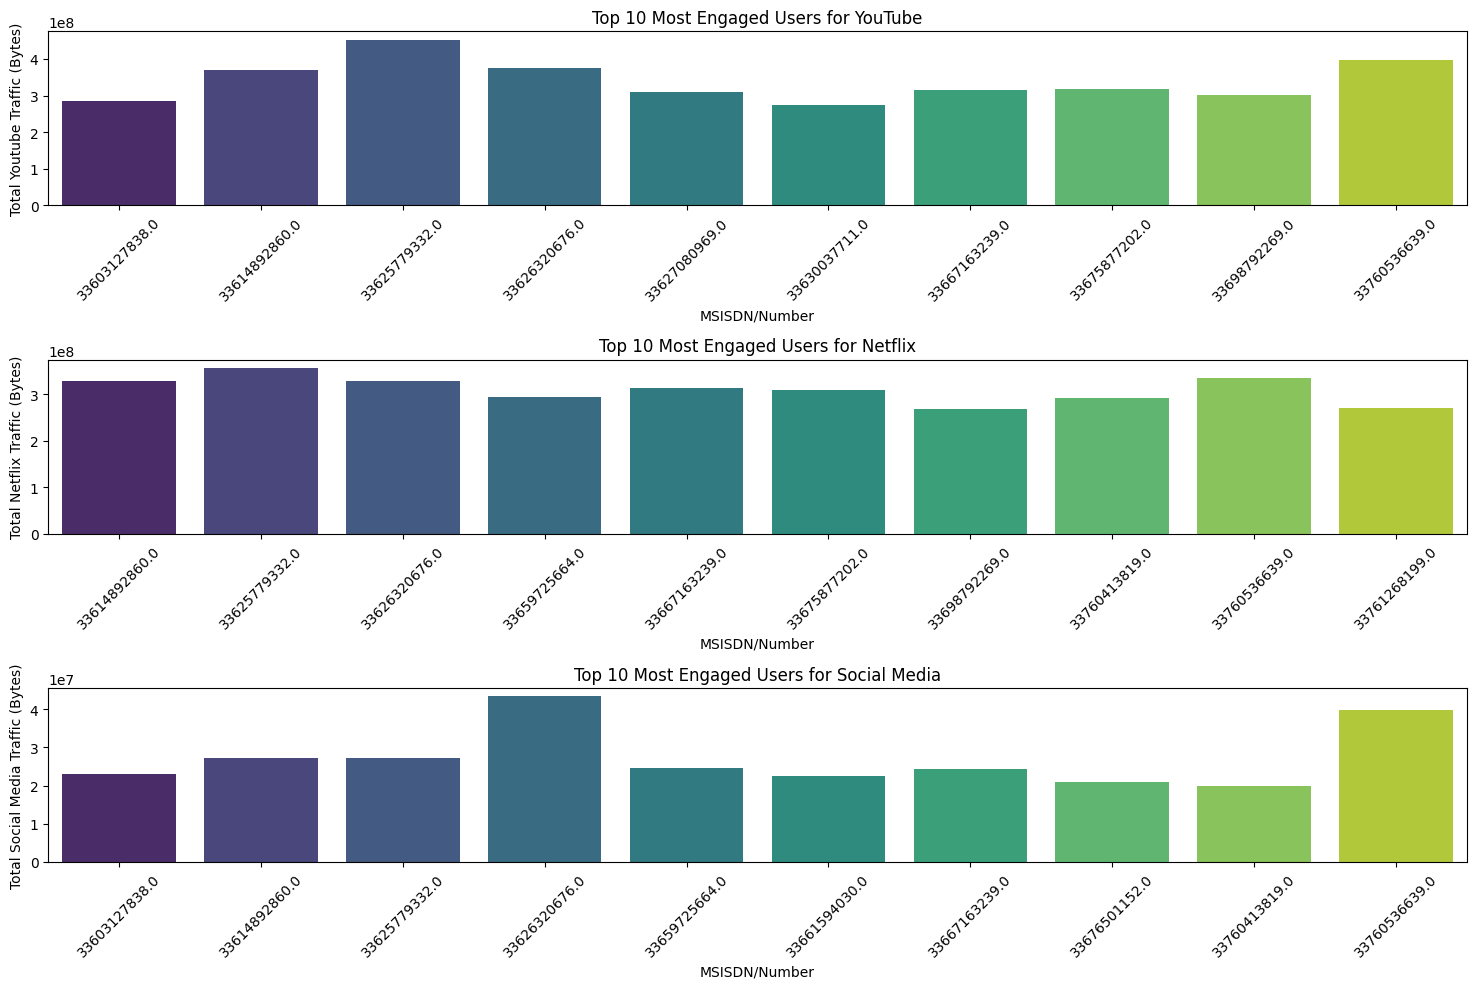

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 3 most used applications
plt.figure(figsize=(15, 10))

# Top 3 most used applications: YouTube, Netflix, and Social Media
plt.subplot(3, 1, 1)
sns.barplot(x=top_10_youtube['MSISDN/Number'], y=top_10_youtube['Total Youtube Traffic (Bytes)'], palette='viridis')
plt.title('Top 10 Most Engaged Users for YouTube')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Youtube Traffic (Bytes)')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
sns.barplot(x=top_10_netflix['MSISDN/Number'], y=top_10_netflix['Total Netflix Traffic (Bytes)'], palette='viridis')
plt.title('Top 10 Most Engaged Users for Netflix')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Netflix Traffic (Bytes)')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
sns.barplot(x=top_10_social_media['MSISDN/Number'], y=top_10_social_media['Total Social Media Traffic (Bytes)'], palette='viridis')
plt.title('Top 10 Most Engaged Users for Social Media')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Social Media Traffic (Bytes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


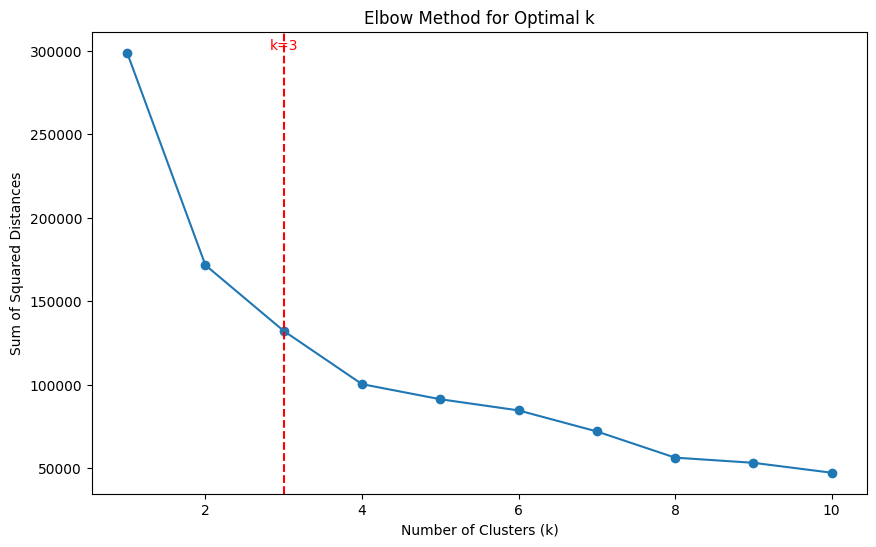

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalize each engagement metric
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Sessions Frequency', 'Total Session Duration (ms)', 'Total Traffic (Bytes)']])

# Determine the optimized value of k using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_metrics)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')

# Add a vertical line at the optimal k value
optimal_k = 3
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.text(optimal_k, max(sse), f'k={optimal_k}', color='red', ha='center', va='bottom')

plt.show()